In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import seaborn as sbn

dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)

from lib.utils import extract_experiment_data_oos # noqa
from lib.utils import classification_table, get_fold_acc_auc # noqa

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Separed site analysis

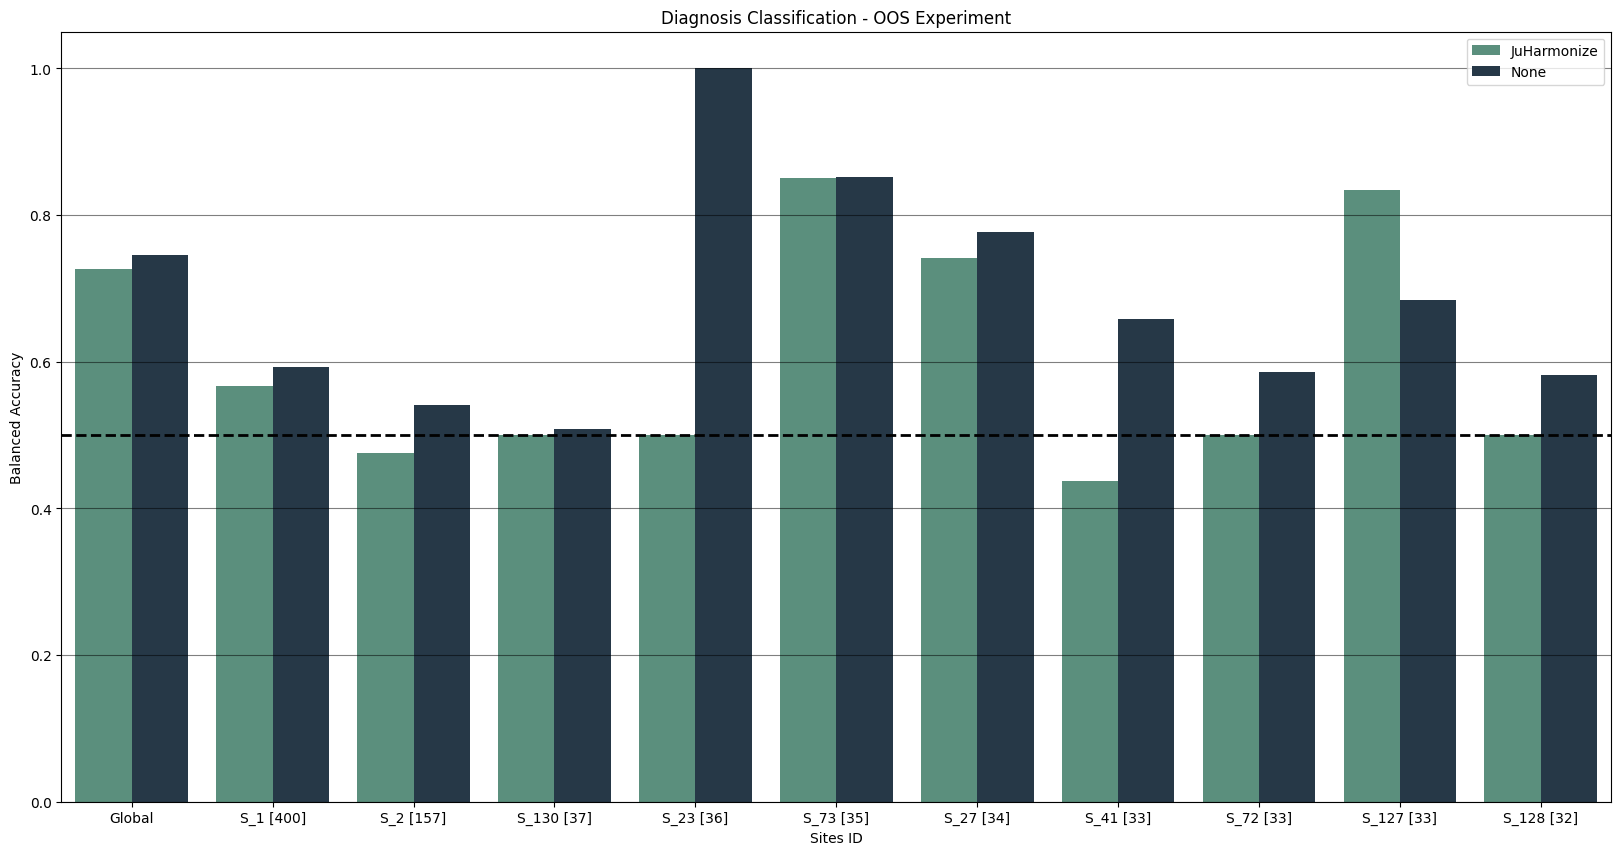

In [3]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification_oos/" # noqa

for n, site in enumerate([1, 2, 130, 23, 73, 27, 41, 72, 127, 128]):
    to_check = {'test_classification_oos_Kersten_data_SITE_'+str(site)+'_gssvm_pred_logit_stack'} # noqa
    results_exp_ID = extract_experiment_data_oos(exp_dir, to_check)
    results_exp_ID["site"] = "SITE_" + str(site)

    if n == 0:
        data = results_exp_ID
    else:
        data = pd.concat([data, results_exp_ID])

data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)


data["y_diff"] = (data["y_true"]-np.round(data["y_pred"]))
data["fold"] = 0
data["repeat"] = 1

data = get_fold_acc_auc(data)

# Change to appropiated names
data["Harmonization Schemes"].replace({"pretend_nosite":
                                       "JuHarmonize",
                                       "none": "None"},
                                      inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "None"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
# Plot

# Plot
fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(2, rot=-.5, light=0.5, dark=0.2)
metric_to_plot = "Balanced Accuracy"

sbn.barplot(
    data=data, zorder=1, palette=pal,
    x="site", y=metric_to_plot, hue="Harmonization Schemes",
    hue_order=harm_modes, dodge=True, ax=ax
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)])
ax.axhline(0.5, lw=2, color="k", ls="--", alpha=1, label="Chance level")

plt.ylabel(metric_to_plot)
plt.xlabel("Sites ID")

site_list = ["Global",
             "S_1 [400]",
             "S_2 [157]",
             "S_130 [37]",
             "S_23 [36]",
             "S_73 [35]",
             "S_27 [34]",
             "S_41 [33]",
             "S_72 [33]",
             "S_127 [33]",
             "S_128 [32]",
             ]

ax.set_xticklabels(site_list)
plt.title("Diagnosis Classification - OOS Experiment")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()


# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Global comparision With stadistical comparision